In [37]:
import json

import json

# Load configuration
with open("../../config/config_notebooks.json", "r") as config_file:
    config = json.load(config_file)

file_path = "/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2/pipeline/uni/shannon_entropy/HER2/shannon_entropy.json"
with open(file_path, "r") as f:
    shannon_entropy = json.load(f)

shannon_entropy['whole_matrix']['raw']

0.40504876027737374

In [3]:
file_path = "/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2_macenko/pipeline/uni/shannon_entropy/HER2/shannon_entropy.json"
with open(file_path, "r") as f:
    shannon_entropy_macenko = json.load(f)

In [4]:
uni = shannon_entropy['whole_matrix']['raw']
uni_macenko = shannon_entropy_macenko['whole_matrix']['raw_all_patches']

/tmp/ipykernel_1373547/1205200345.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["uni", "uni_macenko"], y=[uni, uni_macenko], palette=["deepskyblue", "slateblue" ])


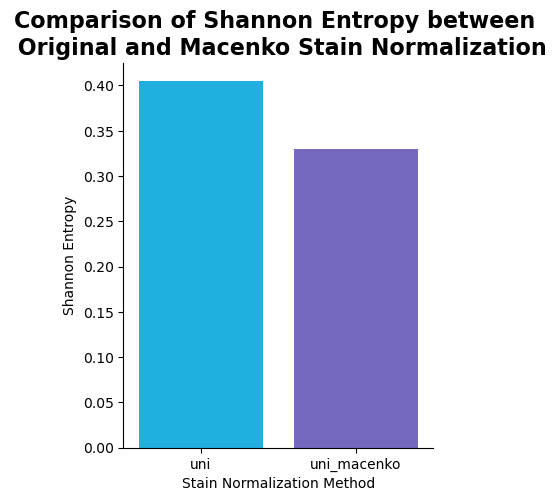

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,5))
sns.barplot(x=["uni", "uni_macenko"], y=[uni, uni_macenko], palette=["deepskyblue", "slateblue" ])
plt.ylabel("Shannon Entropy")
plt.xlabel("Stain Normalization Method")
plt.title(f"Comparison of Shannon Entropy between \n Original and Macenko Stain Normalization", weight='bold', fontsize=16)
sns.despine()

In [6]:
import sys
sys.path.append("../..")
from digitalhistopathology.benchmark.benchmark_clustering import BenchmarkClustering
import os
# Initialize the BenchmarkClustering object


2025-10-20 15:06:59.608334: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :
2025-10-20 15:06:59.608465: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :
2025-10-20 15:06:59.608473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/stlearn/tl/cci/het.py:206: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


In [7]:
saving_folder=os.path.join("/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2/benchmark", "unsupervised_clustering_ARI", "kmeans")
extension='pdf'
path_pipelines = ["/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2/pipeline/uni"]
pipelines_list = ["uni"]

benchmark_uni = BenchmarkClustering(path_to_pipeline=path_pipelines,
                                           pipelines_list=pipelines_list,
                                           results_folder="../results",
                                           saving_folder=saving_folder,
                                           dataset="HER2",
                                           extension=extension
                                           )

['uni']
<class 'list'>
Label files: []


In [8]:

saving_folder=os.path.join("/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2_macenko/benchmark", "unsupervised_clustering_ARI", "kmeans")
extension='pdf'
path_pipelines = ["/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2_macenko/pipeline/uni"]
pipelines_list = ["uni_macenko"]

benchmark_macenko = BenchmarkClustering(path_to_pipeline=path_pipelines,
                                           pipelines_list=pipelines_list,
                                           results_folder="../results",
                                           saving_folder=saving_folder,
                                           dataset="HER2",
                                           extension=extension
                                           )

['uni_macenko']
<class 'list'>
Label files: []


In [9]:
umap_clust = benchmark_macenko.get_best_UMAP_ari_per_slide(force_loading=True)


Embeddings per patient: None
Model: uni_macenko
Force loading best UMAP parameters for model uni_macenko for existing patients...
Model: uni_macenko
Force loading best UMAP parameters for model uni_macenko for existing patients...


In [10]:
import glob
macenko_umap_clust = {}
for file in glob.glob("/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2_macenko/benchmark/unsupervised_clustering_ARI/kmeans/best_umap_ari_model_uni_HER2_macenko_patient*"):
    patient_name = file.split("patient_")[1].split(".")[0]
    # load json
    with open(file, "r") as f:
        best_ari = json.load(f)
    print(f"Patient: {patient_name}, Best UMAP ARI: {best_ari['ari']}")
    macenko_umap_clust[patient_name] = best_ari['ari']

Patient: C1, Best UMAP ARI: 0.18768799277463352
Patient: D1, Best UMAP ARI: 0.34930194766263406
Patient: G2, Best UMAP ARI: 0.24078781350385275
Patient: E1, Best UMAP ARI: 0.3332867128917505
Patient: H1, Best UMAP ARI: 0.3481109921066745
Patient: B1, Best UMAP ARI: 0.33716546445920526
Patient: F1, Best UMAP ARI: 0.08173407362255997


In [11]:
import glob
uni_umap_clust = {}
for file in glob.glob("/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2/benchmark/base_models/unsupervised_clustering_ARI/kmeans/best_umap_ari_model_uni_patient*"):
    patient_name = file.split("patient_")[1].split(".")[0]
    # load json
    with open(file, "r") as f:
        best_ari = json.load(f)
    print(f"Patient: {patient_name}, Best UMAP ARI: {best_ari['ari']}")

    uni_umap_clust[patient_name] = best_ari['ari']

Patient: C1, Best UMAP ARI: 0.18328671007228756
Patient: E1, Best UMAP ARI: 0.3498411590169387
Patient: D1, Best UMAP ARI: 0.29479432133878974
Patient: G2, Best UMAP ARI: 0.28416330422425307
Patient: H1, Best UMAP ARI: 0.3854857063617265
Patient: F1, Best UMAP ARI: 0.10734288748525796
Patient: B1, Best UMAP ARI: 0.41575507360857394


In [12]:
dicto = {"uni": uni_umap_clust, "macenko": macenko_umap_clust}

In [13]:
import pandas as pd
df = pd.DataFrame(dicto)



/tmp/ipykernel_1373547/404349055.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="method", y="ARI", palette=["deepskyblue", "slateblue" ])


Text(0.5, 1.0, 'ARI per patient')

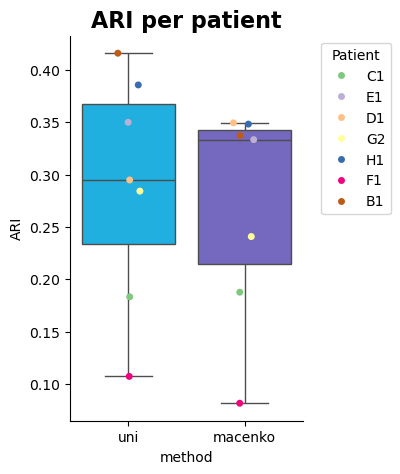

In [14]:
df["patient"] = df.index
df_melted = df.melt(id_vars=["patient"], value_vars=["uni", "macenko"], var_name="method", value_name="ARI")

plt.figure(figsize=(3,5))
sns.boxplot(data=df_melted, x="method", y="ARI", palette=["deepskyblue", "slateblue" ])
sns.stripplot(data=df_melted, x="method", y="ARI", hue='patient', palette="Accent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Patient')
sns.despine()
plt.title("ARI per patient", weight='bold', fontsize=16)

In [15]:
df_melted

,patient,method,ARI
0,C1,uni,0.183287
1,E1,uni,0.349841
2,D1,uni,0.294794
3,G2,uni,0.284163
4,H1,uni,0.385486
5,F1,uni,0.107343
6,B1,uni,0.415755
7,C1,macenko,0.187688
8,E1,macenko,0.333287
9,D1,macenko,0.349302


/tmp/ipykernel_1373547/2717198329.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.barplot(df.mean(), palette=["deepskyblue", "slateblue" ])
/tmp/ipykernel_1373547/2717198329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df.mean(), palette=["deepskyblue", "slateblue" ])


Text(0.5, 1.0, 'Average ARI across Patients')

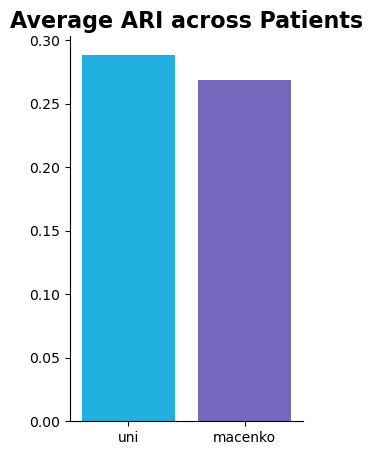

In [16]:
plt.figure(figsize=(3,5))
sns.barplot(df.mean(), palette=["deepskyblue", "slateblue" ])
sns.despine()
plt.title("Average ARI across Patients", weight='bold', fontsize=16)

/tmp/ipykernel_1373547/1216382858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["uni", "uni_macenko"], y=[ari_overall_uni, ari_overall_macenko], palette=["deepskyblue", "slateblue" ])


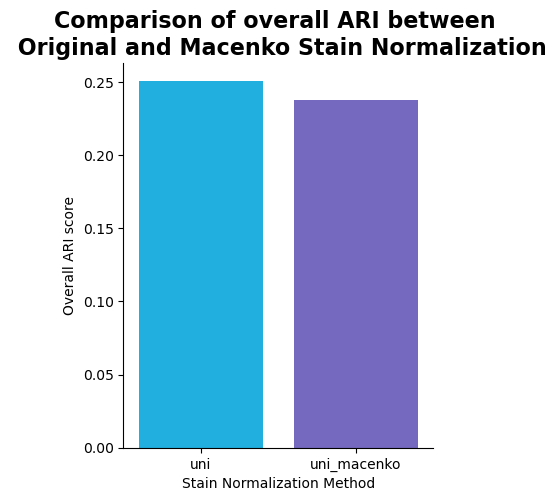

In [17]:
## ARI overall
file_path = "/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2/benchmark/base_models/unsupervised_clustering_ARI/kmeans/best_umap_ari_model_uni_all.json"
with open(file_path, "r") as f:
    ari_overall_uni = json.load(f)["ari"]

## ARI overall
file_path = "/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2_macenko/benchmark/unsupervised_clustering_ARI/kmeans/best_umap_ari_model_uni_HER2_macenko_all.json"
with open(file_path, "r") as f:
    ari_overall_macenko = json.load(f)["ari"]

plt.figure(figsize=(4,5))
sns.barplot(x=["uni", "uni_macenko"], y=[ari_overall_uni, ari_overall_macenko], palette=["deepskyblue", "slateblue" ])
plt.ylabel("Overall ARI score")
plt.xlabel("Stain Normalization Method")
plt.title(f"Comparison of overall ARI between \n Original and Macenko Stain Normalization", weight='bold', fontsize=16)
sns.despine()



In [30]:

## Batch effect

file_path = "/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2_macenko/benchmark/unsupervised_clustering_ARI/kmeans/ARI_patient.json"
with open(file_path, "r") as f:
    ari_patient_macenko = json.load(f)["uni_HER2_macenko"]


In [46]:
# Contrast with all other models
file_path = "/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2/benchmark/uni_explora_models/unsupervised_clustering_ARI/kmeans/ARI_patient.json"
with open(file_path, "r") as f:
    ari_patient_explora = json.load(f)



In [47]:
# Contrast with all other models
file_path = "/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/HER2/benchmark/uni_full_models/unsupervised_clustering_ARI/kmeans/ARI_patient.json"
with open(file_path, "r") as f:
    ari_patient_full = json.load(f)

In [48]:
# concatenate the two dictionaries in two useful ways:
# 1) merged with source-prefixed keys (no collisions)
batch_dict = {k: v for k, v in ari_patient_explora.items()}
batch_dict.update({k: v for k, v in ari_patient_full.items()})
batch_dict["macenko"] = ari_patient_macenko

batch_dict = {k: 1-v for k, v in batch_dict.items()}


In [51]:
batch_dict

{'uni': 0.719182193275257,
 'uni_explora_kde_4096_prototypes': 0.7572991642099309,
 'uni_explora_kde_16384_prototypes': 0.6981983324404459,
 'uni_explora_kde_65536_prototypes': 0.7596844687356604,
 'uni_explora_koleo_4096_prototypes': 0.7593014090536595,
 'uni_explora_koleo_16384_prototypes': 0.7380268373486127,
 'uni_explora_koleo_65536_prototypes': 0.7281619478612387,
 'handcrafted_features': 0.906873612026758,
 'uni_full_kde_4096_prototypes': 0.8234559193433407,
 'uni_full_kde_16384_prototypes': 0.8217170666372899,
 'uni_full_kde_65536_prototypes': 0.7889396273737787,
 'uni_full_koleo_4096_prototypes': 0.8413940661740538,
 'uni_full_koleo_16384_prototypes': 0.8272505788605989,
 'uni_full_koleo_65536_prototypes': 0.8216777361905749,
 'macenko': 0.7794400003545279}

In [53]:
import sys
sys.path.append("../../")
from digitalhistopathology.notebooks_utils import sort_retrained_models


retrained_models = config['retrained_model_list1'] + config['retrained_model_list2']
sorted_retrained_models = sort_retrained_models(retrained_models)

sorted_retrained_models.append("handcrafted_features")
sorted_retrained_models.append("macenko")

palette = []
for model in sorted_retrained_models:
    if "explora" in model:
        palette.append("white")
    elif "full" in model:
        palette.append("black")

    elif model == "macenko":
        palette.append("slateblue")
    
    elif model == "handcrafted_features":
        palette.append("gray")
    else:
        palette.append("deepskyblue")

In [55]:
df_batch = pd.DataFrame.from_dict(batch_dict, orient='index', columns=['batch_effect']).loc[sorted_retrained_models]

In [58]:
df_batch

,batch_effect
uni,0.719182
uni_explora_kde_4096_prototypes,0.757299
uni_explora_kde_16384_prototypes,0.698198
uni_explora_kde_65536_prototypes,0.759684
uni_full_kde_4096_prototypes,0.823456
uni_full_kde_16384_prototypes,0.821717
uni_full_kde_65536_prototypes,0.788940
uni_explora_koleo_4096_prototypes,0.759301
uni_explora_koleo_16384_prototypes,0.738027
uni_explora_koleo_65536_prototypes,0.728162


/tmp/ipykernel_1373547/1389517309.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_batch.index, y=df_batch["batch_effect"], palette=palette, edgecolor='black')


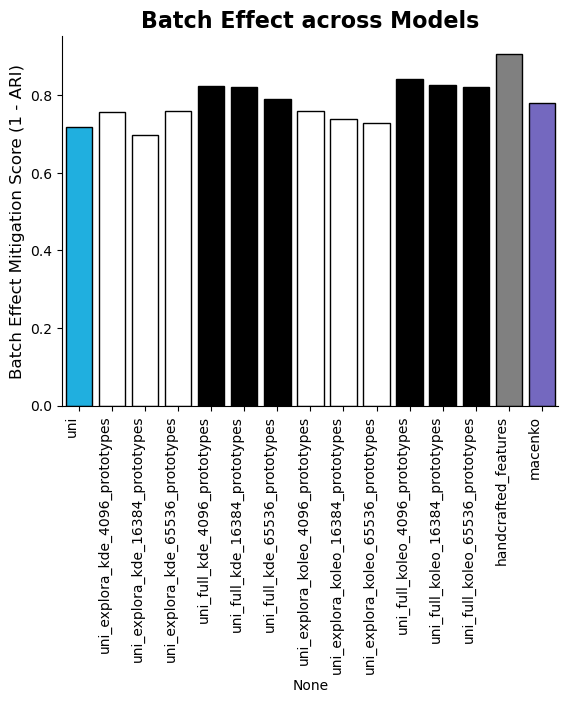

In [63]:
sns.barplot(x=df_batch.index, y=df_batch["batch_effect"], palette=palette, edgecolor='black')
plt.xticks(rotation=90, ha='right');
plt.title("Batch Effect across Models", weight='bold', fontsize=16)
plt.ylabel("Batch Effect Mitigation Score (1 - ARI)", fontsize=12)
sns.despine()